In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import tensorflow as tf
from waveimage import WaveImage, calc_dim, calc_U, mnist_reshape_32
from scipy.stats import multivariate_normal
import math, sys, os, pickle
from record import Record, affiche_records
import time

In [10]:
#dict_records = np.load('data/mnist-waveimage-FCNN-records-predictive-1e-05.npy').tolist()
dict_records = np.load('mnist-waveimage-CNN-backbone-records-predictive.npy').tolist()

In [11]:
NB_CLASSES = 10
NB_TRIALS = 100



Policy : predictive
Threshold : 0.1
classif rate : 94.9
nb_saccades : 5.384
nb_coeffs : 47.242
compression rate : 93.9742346939
final posterior : 0.993771
final entropy : 0.0353466


Policy : predictive
Threshold : 0.01
classif rate : 93.7
nb_saccades : 16.016
nb_coeffs : 95.242
compression rate : 87.8517857143
final posterior : 0.994976
final entropy : 0.0137162


KeyError: 0.001

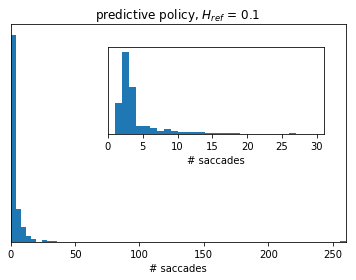

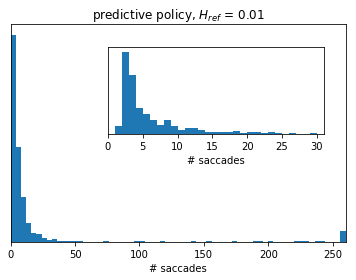

In [12]:
liste_NB_TRIALS = []
for z in range(NB_CLASSES):
    liste_NB_TRIALS += [NB_TRIALS] #[len(Data_test[z][0][(0,0)])]

mem_classif_rate = {}
mem_mem_saccades = {}
mem_mem_compression_rate = {}

for POL in ('predictive',): #'random',): #'saliency-based',): #', ' ):
    mem_classif_rate[POL] = []
    mem_mem_saccades[POL] = []
    mem_mem_compression_rate[POL] = []
    
    for THRESHOLD in (1e-1, 1e-2, 1e-3,): # 1e-4): #, 1e-5):
        classif_rate, mem_saccades, mem_compression_rate = affiche_records(dict_records[POL][THRESHOLD], liste_NB_TRIALS)
        mem_classif_rate[POL] += [classif_rate]
        mem_mem_saccades[POL] += [mem_saccades]
        mem_mem_compression_rate[POL] += [mem_compression_rate]

In [15]:
records = dict_records[POL][0.01]
for i in range(len(records)):
    print(records[i].mem_H)

[2.3025850929940455, 1.8129904, 0.028715426, 5.1220744e-05]
[2.3025850929940455, 1.9364154, 0.033719711, 0.00011451782]
[2.3025850929940455, 1.9423432, 0.055559676, 0.00015411717]
[2.3025850929940455, 1.5473626, 0.00069082354]
[2.3025850929940455, 1.857439, 0.013354848, 1.8717914e-05]
[2.3025850929940455, 1.9755938, 0.67240953, 0.0098966314]
[2.3025850929940455, 1.950861, 0.2845526, 0.11108182, 0.00036991664]
[2.3025850929940455, 1.7338793, 0.002980961]
[2.3025850929940455, 1.9872088, 0.013423142, 0.00016744278]
[2.3025850929940455, 1.9462215, 1.0611556, 0.073068246, 0.054925211, 0.01279917, 0.012373685, 3.2042448e-05]
[2.3025850929940455, 2.0108325, 0.072753817, 0.00030956228]
[2.3025850929940455, 2.0271611, 0.039973617, 0.00025038808]
[2.3025850929940455, 2.0401132, 0.64177567, 0.009504444]
[2.3025850929940455, 1.8101585, 0.0017956884]
[2.3025850929940455, 1.800855, 0.0011550961]
[2.3025850929940455, 1.9370019, 0.0048125945]
[2.3025850929940455, 1.9283574, 0.060354073, 5.0627565e-05]

In [7]:
success_list = []
saccades_list = []
for i in range(len(records)):
    success_list += [records[i].success]
print np.sum(success_list) * 1./len(success_list)

NameError: name 'records' is not defined